In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

C:\Users\ACER\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Explanatory Data Analysis

### 1.1 Read train and test data set:

In [2]:
X_train = pd.read_csv(r'weather_data_train.csv', index_col = 'datetime', sep = ';', decimal = ',', infer_datetime_format=True)
X_train_labels = pd.read_csv(r'weather_data_train_labels.csv', index_col = 'datetime', sep = ';', decimal = ',', infer_datetime_format=True)
X_test = pd.read_csv(r'weather_data_test.csv', index_col = 'datetime', sep = ';', decimal = ',', infer_datetime_format=True)
X_test_labels = pd.read_csv(r'weather_data_test_labels.csv', index_col = 'datetime', sep = ';', decimal = ',', infer_datetime_format=True)

### 1.2 Histogram:

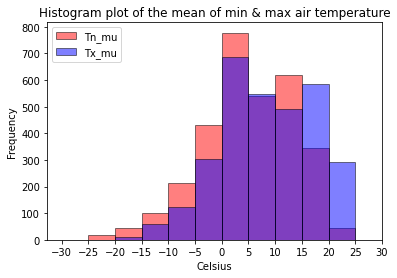

In [73]:
plt.figure()
bins = range(-30, 30, 5)
plt.hist(X_train.Tn_mu, bins, alpha = 0.5, edgecolor='k', label = 'Tn_mu', color = 'r')
plt.hist(X_train.Tx_mu, bins, alpha = 0.5, edgecolor='k', label = 'Tx_mu', color = 'b')
plt.legend(loc='upper left')
plt.title('Histogram plot of the mean of min & max air temperature')
plt.xlabel('Celsius')
plt.ylabel('Frequency')
plt.xticks(range(-30, 35, 5))
plt.show()

### 1.3 Pair plot

In [4]:
df = X_train.copy()
df['U_mu'] = X_train_labels['U_mu']
df['OBSERVED'] = X_train_labels['OBSERVED']

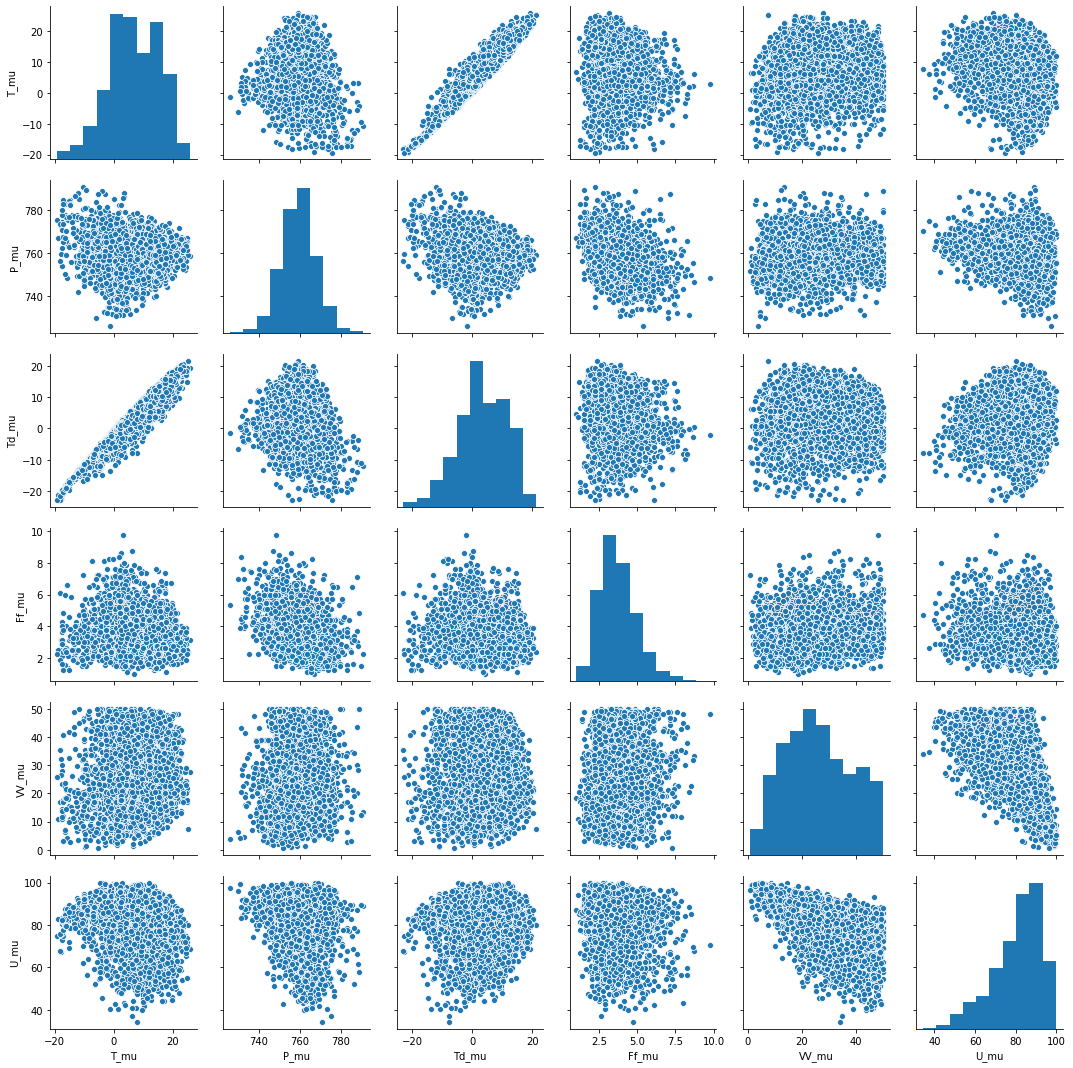

In [76]:
pp = sns.pairplot(df, vars = ['T_mu', 'P_mu','Td_mu','Ff_mu', 'VV_mu', 'U_mu'], kind = 'scatter')
plt.show(pp)

### 1.4 Correlation matrix

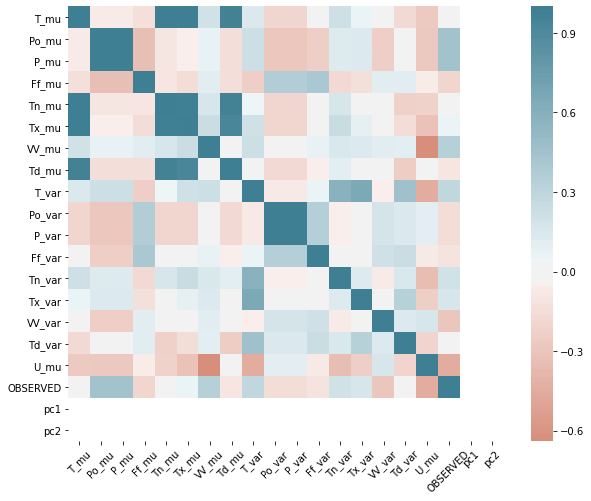

In [80]:
#Correlation matrix
plt.figure(figsize = (10,8))
corr = df.corr()
ax = sns.heatmap(
    corr, annot = False,
    center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0
);

### 1.4 PCA

Standardize data:

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
train = scaler.transform(X_train)
test = scaler.transform(X_test)

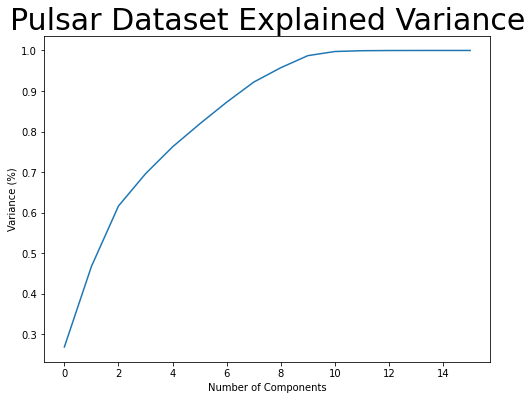

In [22]:
#Fitting the PCA algorithm with our Data
pca3 = PCA().fit(train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize = (8, 6))
plt.plot(np.cumsum(pca3.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize = 10)
plt.ylabel('Variance (%)', fontsize = 10) #for each component
plt.title('Pulsar Dataset Explained Variance', fontsize = 30)
plt.show()

# 2. Modeling

## 2.1 No PCA

### 2.1.1 Linear Regression:

In [25]:
# Normalize data
Norm = preprocessing.normalize(X_train)
Norm_test = preprocessing.normalize(X_test)

In [29]:
R = linear_model.LinearRegression()
R.fit(Norm, X_train_labels['U_mu'])
#print("R coef:\n", R.coef_)
predictions = R.predict(Norm_test)
#print(predictions[0:5])
#print(R.score(Norm, X_train_labels['U_mu']))
#print(R.intercept_)
bfrom sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MSE:", mean_squared_error(X_test_labels['U_mu'], predictions))
print("RMSE:", np.sqrt(mean_squared_error(X_test_labels['U_mu'], predictions)))
print("MAE:", mean_absolute_error(X_test_labels['U_mu'], predictions))
print("R square score:", r2_score(X_test_labels['U_mu'], predictions))
predicted_df = pd.DataFrame(predictions)

MSE: 2.6114079680303224
RMSE: 1.615985138554907
MAE: 1.1513245033791542
R square score: 0.9838676780985712


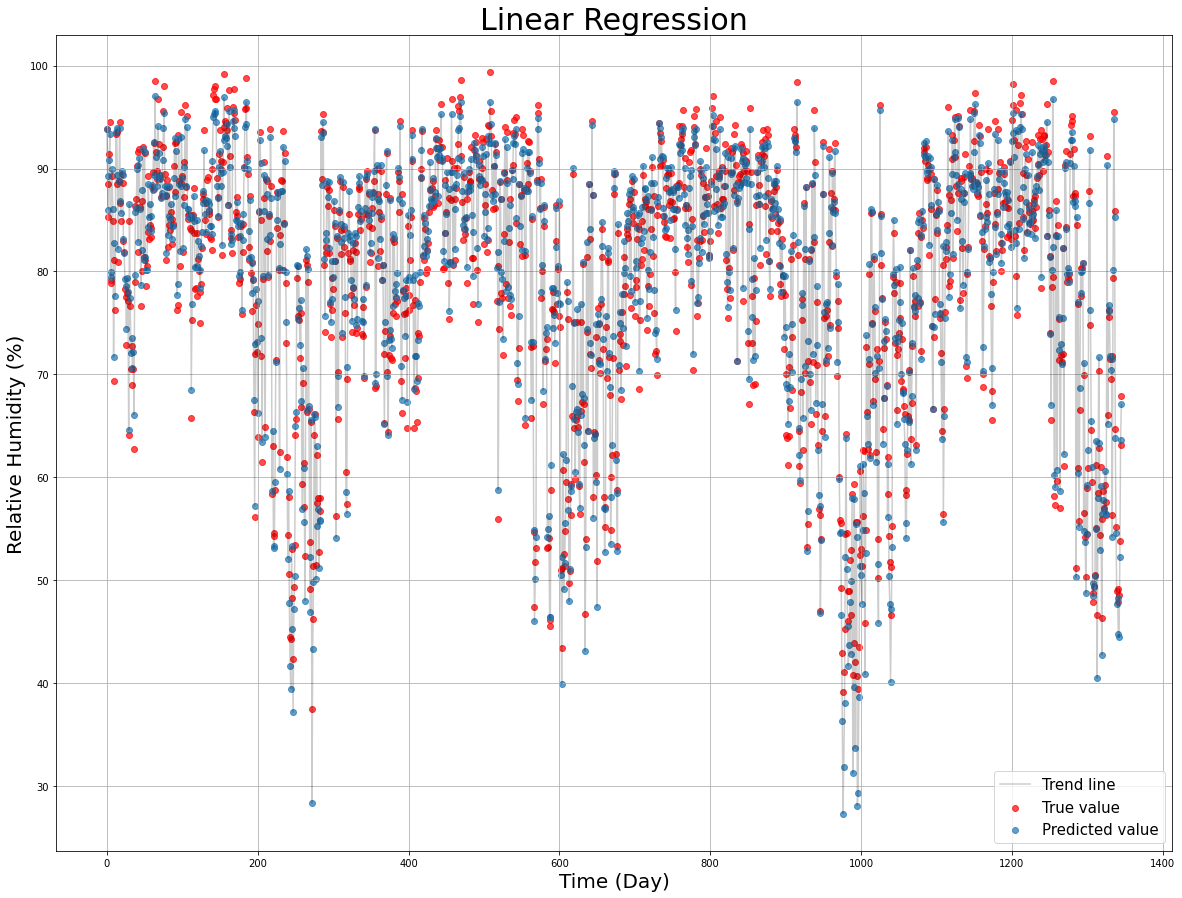

In [41]:
plt.figure(figsize = (20, 15))
plt.plot(predictions, color = 'k', alpha = 0.2, label = 'Trend line')
plt.scatter(x = range(X_test_labels['U_mu'].size), y = X_test_labels['U_mu'], label = 'True value', color = 'r', alpha = 0.7)
plt.scatter(x = range(X_test_labels['U_mu'].size), y = predictions, label = 'Predicted value', alpha = 0.7)
plt.legend(loc='lower right', prop={'size': 15})
plt.ylabel("Relative Humidity (%)", fontsize=20)
plt.xlabel("Time (Day)", fontsize=20)
plt.title("Linear Regression", fontsize=30)
plt.grid()
plt.show()

### 2.1.2 Polynomial Regression:

MSE poly: 0.2810222066792627


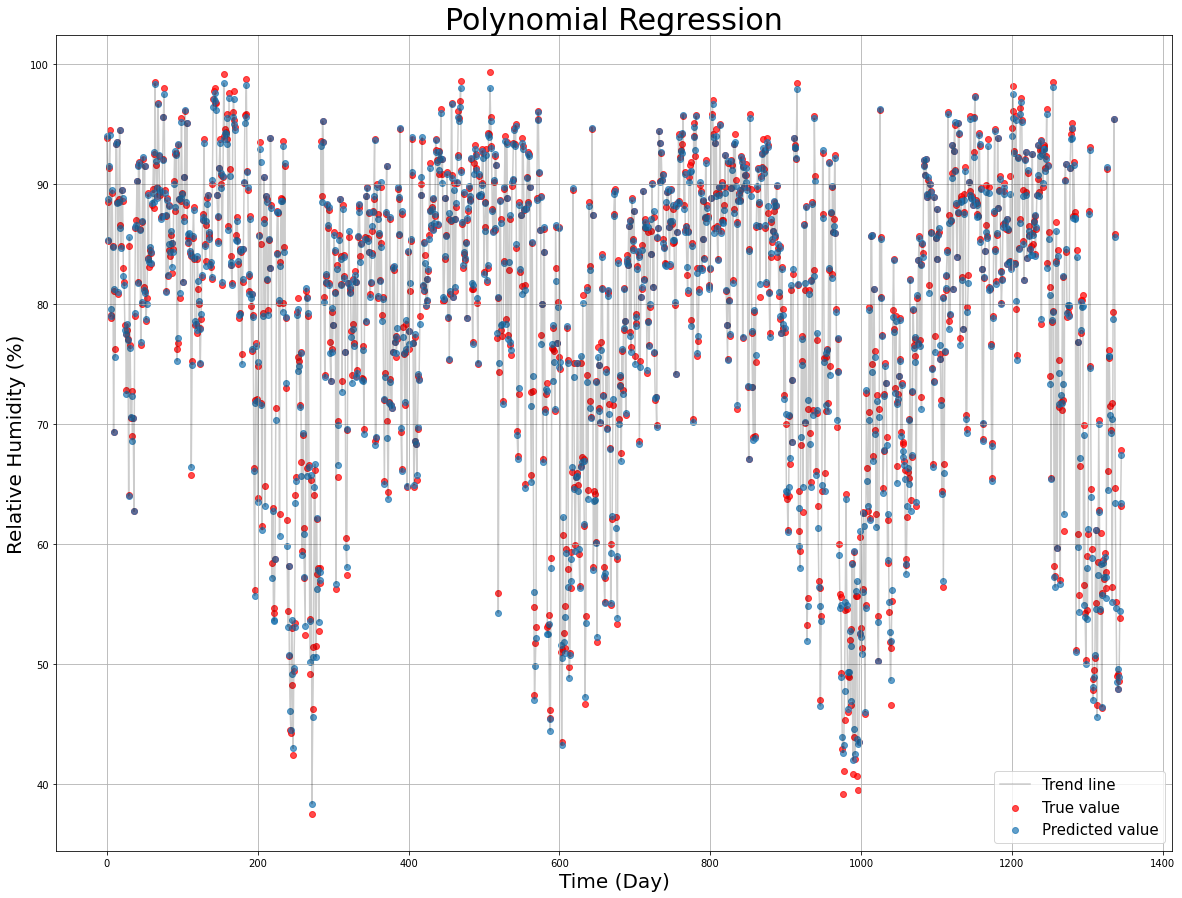

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

polynomial_features= PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)
#print(X_train_poly)
Norm = preprocessing.normalize(X_train_poly)
Norm_test = preprocessing.normalize(X_test_poly)
R = linear_model.LinearRegression()
R.fit(Norm, X_train_labels['U_mu'])
poly_pred = R.predict(Norm_test)
prepredictions = R.predict(Norm)
print("MSE poly:", mean_squared_error(X_test_labels['U_mu'], poly_pred))

plt.figure(figsize = (20, 15))
plt.plot(poly_pred, color = 'k', alpha = 0.2, label = 'Trend line')
plt.scatter(x = range(X_test_labels['U_mu'].size), y = X_test_labels['U_mu'], label = 'True value', color = 'r', alpha = 0.7)
plt.scatter(x = range(X_test_labels['U_mu'].size), y = poly_pred, label = 'Predicted value', alpha = 0.7)
plt.legend(loc='lower right', prop={'size': 15})
plt.ylabel("Relative Humidity (%)", fontsize=20)
plt.xlabel("Time (Day)", fontsize=20)
plt.title("Polynomial Regression", fontsize=30)
plt.grid()
plt.show()

In [47]:
X_train = pd.read_csv(r'weather_data_train.csv', index_col = 'datetime', sep = ';', decimal = ',', infer_datetime_format=True)
X_train_labels = pd.read_csv(r'weather_data_train_labels.csv', index_col = 'datetime', sep = ';', decimal = ',', infer_datetime_format=True)
X_test  = pd.read_csv(r'weather_data_test.csv', index_col = 'datetime', sep = ';', decimal = ',', infer_datetime_format=True)
X_test_labels =pd.read_csv(r'weather_data_test_labels.csv', index_col = 'datetime', sep = ';', decimal = ',', infer_datetime_format=True)
y_train = X_train_labels['OBSERVED']
y_test = X_test_labels['OBSERVED']

### 2.1.3 KNN-classification:

In [54]:
def knn_optimize(self, show_plot=True):
    """
    Finds the optimal minimum number of neighbors to use for the KNN classifier.
    :param show_plot: bool, when True shows the plot of number of neighbors vs error
            Default: False
    :return: the number of neighbors (int)
    """
   
    
    error = []

    
    for i in range(1, 50):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error.append(np.mean(pred_i != y_test))

    m = min(error)
    min_ind = error.index(m)

    if show_plot:
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
                 markerfacecolor='blue', markersize=10)
        plt.title('Error Rate K Value', fontsize = 30)
        plt.xlabel('K Value', fontsize = 20)
        plt.ylabel('Mean Error', fontsize = 20)
        plt.show()
        

    return min_ind + 1



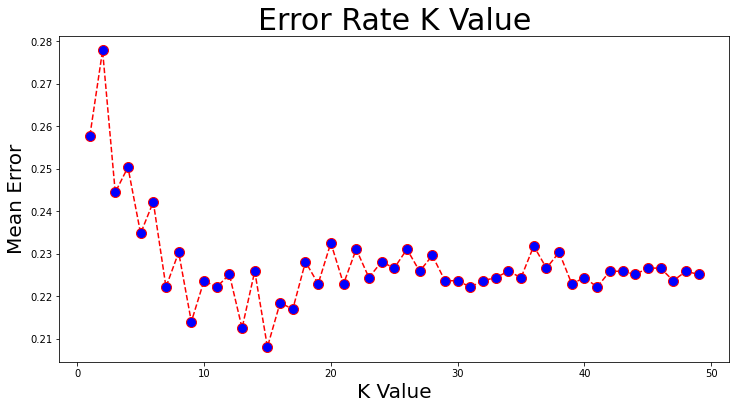

The method 'knn_optimize' found that the mean error reaches the minimum when the number of neighbors K is 15
Confusion matrix KNN:
 [[309 119]
 [161 757]]

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       428
           1       0.86      0.82      0.84       918

    accuracy                           0.79      1346
   macro avg       0.76      0.77      0.77      1346
weighted avg       0.80      0.79      0.79      1346

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1238
           1       0.85      0.83      0.84      1902

    accuracy                           0.81      3140
   macro avg       0.80      0.80      0.80      3140
weighted avg       0.81      0.81      0.81      3140



In [55]:
min_ind = knn_optimize(100, show_plot=True)
print("The method 'knn_optimize' found that " + "the mean error reaches the minimum when the number of neighbors K is", min_ind)
#knn_optimize(100)
knn = KNeighborsClassifier(n_neighbors = min_ind, metric ='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
x_pred = knn.predict(X_train)
print("Confusion matrix KNN:\n", confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))
print(classification_report(y_train, x_pred))

### 2.1.4 Logistic Regression

In [56]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
prediction = LR.predict(X_test)
#print("Prediction:\n", prediction)

cm = metrics.confusion_matrix(y_test, prediction)
print("Confusion matrix Logistic:\n", cm)
print()
print(classification_report(y_test, prediction))

Confusion matrix Logistic:
 [[278 150]
 [164 754]]

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       428
           1       0.83      0.82      0.83       918

    accuracy                           0.77      1346
   macro avg       0.73      0.74      0.73      1346
weighted avg       0.77      0.77      0.77      1346



C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 2.2 PCA applying

In [65]:
scaler = StandardScaler()
scaler.fit(X_train)
train = scaler.transform(X_train)
test = scaler.transform(X_test)

pca10 = PCA(n_components = 10)
pca10.fit(X_train)
reduce_X_train = pca10.transform(train)
reduce_X_test = pca10.transform(test)

### 2.2.1 KNN

In [66]:
def knn_optimize2(self, show_plot=True):
    """
    Finds the optimal minimum number of neighbors to use for the KNN classifier.
    :param show_plot: bool, when True shows the plot of number of neighbors vs error
            Default: False
    :return: the number of neighbors (int)
    """
   
    
    error = []

    
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(reduce_X_train, y_train)
        pred_i = knn.predict(reduce_X_test)
        error.append(np.mean(pred_i != y_test))

    m = min(error)
    min_ind2 = error.index(m)
    print(min_ind2)

    if show_plot:
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
                 markerfacecolor='blue', markersize=10)
        plt.title('Error Rate K Value')
        plt.xlabel('K Value')
        plt.ylabel('Mean Error')
        plt.show()
        

    return min_ind2 + 1

38


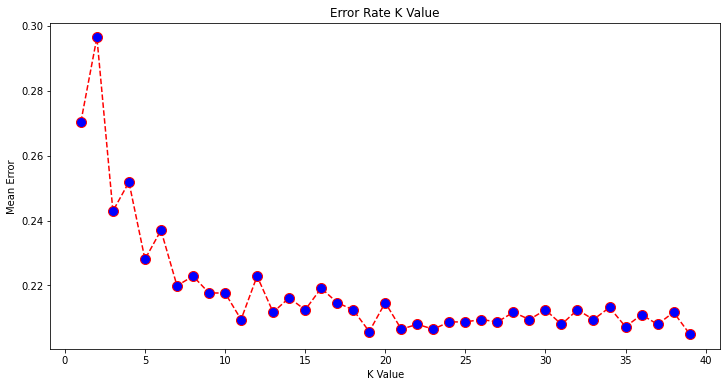

The method 'knn_optimize' found that the mean error reaches the minimum when the number of neighbors K is 39
[[301 127]
 [149 769]]

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       428
           1       0.86      0.84      0.85       918

    accuracy                           0.79      1346
   macro avg       0.76      0.77      0.77      1346
weighted avg       0.80      0.79      0.80      1346

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1238
           1       0.82      0.85      0.83      1902

    accuracy                           0.80      3140
   macro avg       0.79      0.78      0.78      3140
weighted avg       0.79      0.80      0.79      3140



In [69]:
min_ind2 = knn_optimize2(100, show_plot=True)
print("The method 'knn_optimize' found that " + "the mean error reaches the minimum when the number of neighbors K is", min_ind2)
#knn_optimize2(100)
knn = KNeighborsClassifier(n_neighbors=min_ind2, metric ='euclidean')
knn.fit(reduce_X_train, y_train)
y_pred = knn.predict(reduce_X_test)
x_pred = knn.predict(reduce_X_train)
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))
print(classification_report(y_train, x_pred))

### 2.2.2 Logistic Regression

In [72]:
LR = LogisticRegression()
LR.fit(reduce_X_train, y_train)
prediction = LR.predict(reduce_X_test)
#print("Prediction:\n", prediction)

cm = metrics.confusion_matrix(y_test, prediction)
print("Confusion matrix Logistic:\n", cm)
print()
print(classification_report(y_test, prediction))

Confusion matrix Logistic:
 [[292 136]
 [175 743]]

              precision    recall  f1-score   support

           0       0.63      0.68      0.65       428
           1       0.85      0.81      0.83       918

    accuracy                           0.77      1346
   macro avg       0.74      0.75      0.74      1346
weighted avg       0.78      0.77      0.77      1346



C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
